In [1]:
%run imports.ipynb

In [221]:
li2016_calls = pd.read_excel('source_data/variant_calls.xlsx', sheet_name='Li2016')
li2016_calls.rename({'Name': 'name'}, axis=1).to_csv('source_data/li2016_variant_calls.csv', index=False)

li2016_calls = pd.read_csv('source_data/li2016_variant_calls.csv')
sample2status = {r.name:r.status for r in li2016_calls.to_records()}

In [222]:
li2016_calls

,name,run_rrbs,run_wxs,run_rnaseq,DNMT3A_mut1,DNMT3A_mut2,DNMT3A_mut3,DNMT3A_pos1,DNMT3A_pos2,DNMT3A_pos3,DNMT3A_mutcount,DNMT3A_truncation1,DNMT3A_truncation2,DNMT3A_truncation2.1,DNMT3A_stability1,DNMT3A_stability2,DNMT3A_stability3,status
0,AML_074_Dx,SRR3088187,SRR3088188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT
1,AML_074_Rel,SRR3088190,SRR3088191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT
2,AML_075_Dx,SRR3088192,SRR3088193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT
3,AML_075_Rel,SRR3088195,SRR3088196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT
4,AML_078_Dx,SRR3088201,SRR3088202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,NBM_10,SRR3088601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NBM
104,NBM_11,SRR3088602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NBM
105,NBM_12,SRR3088603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NBM
106,NBM_13,SRR3088604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NBM


In [223]:
li2016_calls.status.value_counts()

WT       61
R882     16
NBM      14
INS       9
Other     8
Name: status, dtype: int64

In [224]:
pd.read_csv('source_data/stability_scores.csv')

,aa_position,stability_ratio_normalized_to_WT
0,12,0.855598
1,30,0.836011
2,90,1.084197
3,181,1.044739
4,183,1.060101
...,...,...
243,907,0.392546
244,908,0.407881
245,909,0.327513
246,910,0.558161


### Metheor 결과 정리

In [225]:
def read_metheor_pairs_file(f):
    tmp = pd.read_csv(f, sep='\t')
    
    tmp['distance'] = tmp.cpg2 - tmp.cpg1
    tmp = tmp.groupby('distance').agg({'n_concordant': 'sum', 'n_discordant': 'sum'}).reset_index()
    
    return tmp

In [40]:
metheor_results = glob.glob('/data3/project/SNUH_DNMT3A/pipelines/METHEOR/result/DBGAP-ERRBS/*.pairs.tsv')

In [55]:
pairs_result = []

for f in tqdm(metheor_results):
    run = os.path.basename(f).split('.')[0]
    
    df = read_metheor_pairs_file(f)
    df['run'] = run
    
    pairs_result.append(df)
    
pairs_result = pd.concat(pairs_result)

100%|██████████| 108/108 [16:16<00:00,  9.04s/it]


In [69]:
pairs_result['lpmd'] = pairs_result.n_discordant / (pairs_result.n_concordant + pairs_result.n_discordant)

### Source data로 저장 후 figure 그리기

In [226]:
pairs_result_ann = pairs_result.merge(li2016_calls, left_on='run', right_on='run_rrbs', how='outer')

In [227]:
pairs_result_ann

,distance,n_concordant,n_discordant,lpmd,run,name,run_rrbs,run_wxs,run_rnaseq,DNMT3A_mut1,DNMT3A_mut2,DNMT3A_mut3,DNMT3A_pos1,DNMT3A_pos2,DNMT3A_pos3,DNMT3A_mutcount,DNMT3A_truncation1,DNMT3A_truncation2,DNMT3A_truncation2.1,DNMT3A_stability1,DNMT3A_stability2,DNMT3A_stability3,status
0,2,26188017,1037024,0.038091,SRR3088441,AML_127_Rel,SRR3088441,SRR3088442,SRR15674489,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT
1,3,22487308,1182772,0.049969,SRR3088441,AML_127_Rel,SRR3088441,SRR3088442,SRR15674489,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT
2,4,21906374,1395935,0.059905,SRR3088441,AML_127_Rel,SRR3088441,SRR3088442,SRR15674489,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT
3,5,19818906,1123173,0.053632,SRR3088441,AML_127_Rel,SRR3088441,SRR3088442,SRR15674489,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT
4,6,24703408,1371577,0.052601,SRR3088441,AML_127_Rel,SRR3088441,SRR3088442,SRR15674489,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,20,13532028,969098,0.066829,SRR3088313,AML_101_Dx,SRR3088313,SRR3088314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT
2480,21,13396907,924786,0.064572,SRR3088313,AML_101_Dx,SRR3088313,SRR3088314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT
2481,22,12556182,897462,0.066708,SRR3088313,AML_101_Dx,SRR3088313,SRR3088314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT
2482,23,12086682,844921,0.065338,SRR3088313,AML_101_Dx,SRR3088313,SRR3088314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT


In [228]:
pairs_result_ann[['name', 'run', 'distance', 'n_concordant', 'n_discordant', 'lpmd', 'DNMT3A_stability1', 'status']].rename({
    'run': 'run_rrbs',
    'DNMT3A_stability1': 'stability_score',
}, axis=1).to_csv('source_data/li2016_genomewide_lpmd.csv', index=False)

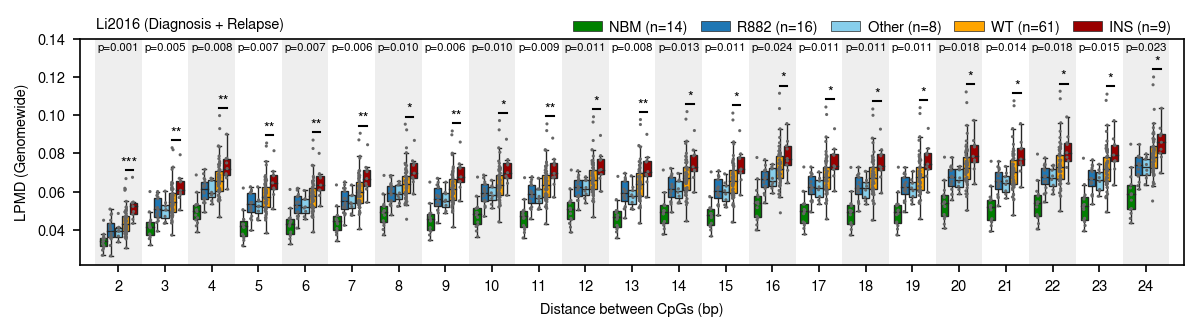

In [452]:
#
# Params for the figure.
#
box_kws = {
    'linewidth': 0.66,
    'showfliers': False,
    'hue_order': ['NBM', 'R882', 'Other', 'WT', 'INS'],
    'palette': ['g', 'C0', 'skyblue', 'orange', '#990000'],
    'saturation': 1.0,
}

strip_kws = {
    'palette': ['0.4'] * 5,
    's': 3,
    'hue_order': ['NBM', 'R882', 'Other', 'WT', 'INS'],
    'dodge': True,
}

max_dist = 24
#
#
#

fig = plt.figure(figsize=(9.5, 2.0))
ax = fig.add_subplot(111)

ax.set_title('Li2016 (Diagnosis + Relapse)', fontsize=7, pad=5, x=0.1)

for i in range(max_dist):
    if i % 2 == 0:
        ax.axvspan(xmin=i-0.5, xmax=i+0.5, fc='0.8', alpha=0.33, zorder=-1)

d = pd.read_csv('source_data/li2016_genomewide_lpmd.csv')
sns.boxplot(data=d[d.distance <= max_dist], x='distance', y='lpmd', hue='status', **box_kws, ax=ax)
sns.stripplot(data=d[d.distance <= max_dist], x='distance', y='lpmd', hue='status', **strip_kws, ax=ax)

# dy = 0.004

for i in range(max_dist - 1):
    _d = d[d.distance == i + 2]
    _, p = stats.mannwhitneyu(_d[_d.status == 'WT'].lpmd, _d[_d.status == 'INS'].lpmd)
    
    ax.plot([i + 0.16, i + 0.32], [_d.lpmd.max() + dy, _d.lpmd.max() + dy], lw=1, c='k')
    
#     ax.text(i + 0.24, _d.lpmd.max() + dy, f'p={p:.3f}', ha='center', va='bottom', fontsize=5)
    ax.text(i, 0.138, f'p={p:.3f}', ha='center', va='top', fontsize=5.5)
    
    if p < 0.001:
        ax.text(i + 0.24, _d.lpmd.max() + dy, '***', ha='center', va='bottom')
    elif p < 0.01:
        ax.text(i + 0.24, _d.lpmd.max() + dy, '**', ha='center', va='bottom')
    elif p < 0.05:
        ax.text(i + 0.24, _d.lpmd.max() + dy, '*', ha='center', va='bottom')
    else:
        ax.text(i + 0.24, _d.lpmd.max() + dy, 'n.s.', ha='center', va='bottom')
    
handles, labels = ax.get_legend_handles_labels()
labels = [f'{l} (n={_d.status.value_counts()[l]})' for l in labels[:5]]
# ax.legend(handles[:5], labels, frameon=False, bbox_to_anchor=(1.01, 0.5), loc='center left', fontsize=7)
ax.legend(handles[:5], labels, frameon=False, bbox_to_anchor=(1.0, 1.05), loc='center right', fontsize=7, ncol=5, handletextpad=0.5, columnspacing=0.9)

ax.set_ylim([ax.get_ylim()[0], 0.14])

ax.set_xlabel('Distance between CpGs (bp)')
ax.set_ylabel('LPMD (Genomewide)')

save_figures('source_data_figures/li2016_lpmd/lpmd_distance_box')

2-bp p-value?

In [459]:
pairs_result_ann = pd.read_csv('source_data/li2016_genomewide_lpmd.csv')

In [464]:
stats.mannwhitneyu(
    pairs_result_ann[(pairs_result_ann.distance == 2) & (pairs_result_ann.status == 'WT')].lpmd,
    pairs_result_ann[(pairs_result_ann.distance == 2) & (pairs_result_ann.status == 'INS')].lpmd,
)

MannwhitneyuResult(statistic=96.0, pvalue=0.0008945794270069367)

### Stability - LPMD correlation

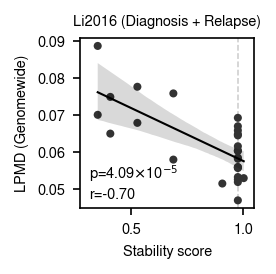

In [497]:
scatter_kws = {
    's': 15,
    'ec': 'none',
    'color': '0.2',
    'alpha': 1.0,
}
line_kws = {
    'lw': 1,
#     'ls': ,
    'color': 'k',
}

pairs_result_ann = pd.read_csv('source_data/li2016_genomewide_lpmd.csv')

data = pairs_result_ann[(pairs_result_ann.distance >= 2) & (pairs_result_ann.distance <= 32)].groupby(['name']).agg({
    'n_concordant': 'sum', 'n_discordant': 'sum',
    'status': 'first', 'stability_score': 'first',
}).reset_index()

data['lpmd'] = data['n_discordant'] / (data.n_discordant + data.n_concordant)

fig = plt.figure(figsize=(1.5, 1.5))
ax = fig.add_subplot(111)

mask = data.stability_score.notnull()
res = stats.linregress(data[mask].stability_score, data[mask].lpmd)

sns.regplot(
    data=data,
    x='stability_score',
    y='lpmd',
    scatter_kws=scatter_kws,
    line_kws=line_kws,
    ax=ax
)

ax.set_xlabel('Stability score')
ax.set_ylabel('LPMD (Genomewide)')
ax.set_title('Li2016 (Diagnosis + Relapse)', fontsize=7)

ax.text(
    x=0.05,
    y=0.04,
#     s=f'p={res.pvalue:.3g}\nr={res.rvalue:.2f}',
    s='p=4.09$\\times$10$^{-5}$\nr=' + f'{res.rvalue:.2f}',
    ha='left',
    va='bottom',
    fontsize=7,
    transform=ax.transAxes,
)
# ax.annotate(text='R882', xy=(0.9764945, ax.get_ylim()[1]), xytext=(0.9764945, ax.get_ylim()[1] + 6e-3), arrowprops={'arrowstyle': '->'}, annotation_clip=False, va='bottom', ha='center')

ax.set_xlim([0.27, 1.05])
ax.axvline(0.9764945, ls='--', lw=0.75, c='0.8', zorder=-1)

save_figures('source_data_figures/li2016_lpmd/li2016_stability_lpmd_correlation')

### Linear regression

In [252]:
basedir = Path('/data/project/SNUH_DNMT3A/data/dbgap-data/64271/PhenoGenotypeFiles/RootStudyConsentSet_phs001027.Epigenetics_AML.v2.p1.c1.GRU-PUB/PhenotypeFiles')
pheno = pd.read_csv(basedir / 'phs001027.v2.pht005216.v1.p1.c1.Epigenetics_AML_Subject_Phenotypes.GRU-PUB.txt', sep='\t', skiprows=10)

names = []
for r in pheno.to_records():
    if 'NBM' in r.SUBJECT_ID:
        names.append(r.SUBJECT_ID)
    elif r.Disease_stage == 'Diagnosis':
        names.append(f'{r.SUBJECT_ID}_Dx')
    else:
        names.append(f'{r.SUBJECT_ID}_Rel')

pheno['name'] = names

In [428]:
li2016_wide = pd.read_excel('../note2/metadata/li2016_mutation_table_manual.xlsx', sheet_name='wide', index_col=0)
li2016_wide['is_aml'] = ~li2016_wide.index.str.contains('NBM')
li2016_wide['is_relapse'] = li2016_wide.index.str.endswith('Rel')

nbm_data = defaultdict(list)
for nbm_sample in pairs_result_ann[pairs_result_ann.status == 'NBM']['name'].unique():
    nbm_data['name'].append(nbm_sample)
    for col in li2016_wide.columns:
        nbm_data[col].append(False)
nbm_data = pd.DataFrame(nbm_data).set_index('name')

li2016_wide = pd.concat([li2016_wide, nbm_data])

li2016_wide['age'] = li2016_wide.index.map(pheno.set_index('name')['Age'].to_dict())
li2016_wide['sex'] = li2016_wide.index.map(pheno.set_index('name')['sex'].to_dict())

li2016_wide['sex_F'] = (li2016_wide.sex == 'F')
li2016_wide = li2016_wide.drop('sex', axis=1).sort_index()

In [429]:
li2016_wide

,DNMT3A_INS,DNMT3A_Other,DNMT3A_R882,ABL1,ASXL1,BCR,CEBPA-sm,CEBPA-dm,EP300,EZH2,FLT3,IDH1,IDH2,KIT,KRAS,MET,NPM1,NRAS,RUNX1,SMO,SRSF2,TET1,TET2,TP53,TSC1,WT1,is_aml,is_relapse,age,sex_F
AML_074_Dx,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,71,False
AML_074_Rel,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,72,False
AML_075_Dx,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,49,True
AML_075_Rel,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,50,True
AML_078_Dx,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,31,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NBM_10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,67,False
NBM_11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,73,False
NBM_12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,76,True
NBM_13,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,72,True


In [430]:
num_mutations = li2016_wide.sum(axis=0).to_dict()

In [481]:
pairs_result_ann = pd.read_csv('source_data/li2016_genomewide_lpmd.csv')

data = pairs_result_ann[(pairs_result_ann.distance >= 2) & (pairs_result_ann.distance <= 32)].groupby(['name']).agg({
    'n_concordant': 'sum', 'n_discordant': 'sum',
    'status': 'first', 'stability_score': 'first',
}).reset_index()

data['lpmd'] = data['n_discordant'] / (data.n_discordant + data.n_concordant)

In [482]:
assert (data.name == li2016_wide.index).all()

In [483]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

In [484]:
model = sm.OLS(
    data.lpmd.values,
    sm.add_constant(li2016_wide.astype(int)),
)

result = model.fit()

In [485]:
summary = result.summary2()

In [486]:
summary.tables[1].to_csv('source_data/li2016_linear_regression_result.csv')

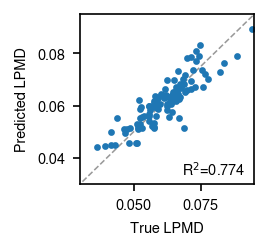

In [487]:
from sklearn.metrics import r2_score

fig = plt.figure()
ax = fig.add_subplot(111)

x = data.lpmd.values
y = model.predict(result.params, sm.add_constant(li2016_wide.astype(int)))
r2 = r2_score(x, y)

ax.scatter(x, y, s=20)
ax.plot([0, 0.1], [0, 0.1], c='0.6', ls='--', zorder=-10)

ax.set_xlim([0.03, 0.095])
ax.set_ylim([0.03, 0.095])

ax.set_xlabel('True LPMD')
ax.set_ylabel('Predicted LPMD')

ax.text(0.95, 0.05, f'R$^2$={r2:.3f}', transform=ax.transAxes, ha='right')

save_figures('source_data_figures/li2016_lpmd/lpmd_linear_regression_scatter')

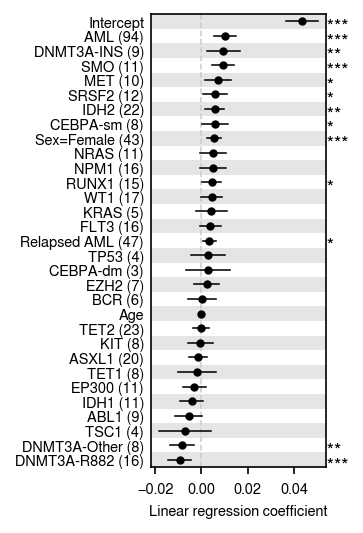

In [488]:
label_map = {
    'DNMT3A_INS': 'DNMT3A-INS',
    'DNMT3A_R882': 'DNMT3A-R882',
    'DNMT3A_Other': 'DNMT3A-Other',
    'is_aml': 'AML',
    'is_relapse': 'Relapsed AML',
    'age': 'Age',
    'sex_F': 'Sex=Female',
    'const': 'Intercept'
}

fig = plt.figure(figsize=(1.5, 4))
ax = fig.add_subplot(111)
ax.invert_yaxis()

d = result.summary2().tables[1].sort_values('Coef.', ascending=False)

# ax.scatter(d['Coef.'], range(len(d)), c='k')
for i, r in enumerate(d.to_records()):
    
    c = 'k'
#     if r.index == 'DNMT3A_INS':
#         c = '#990000'
#     elif r.index == 'DNMT3A_Other':
#         c = 'skyblue'
#     elif r.index == 'DNMT3A_R882': 
#         c = 'C0'
        
    ax.plot([r['[0.025'], r['0.975]']], [i, i], c=c)
    ax.scatter(r['Coef.'], i, c=c)
    
#     if r.index not in ['const', 'age', 'gender_F', 'is_relapse']:
#         n = num_mutations[r.index]
#         ax.text(0.05, i, f'n={n}', fontsize=6, va='center', c=c)
        
    pvalue = r["P>|t|"]
#     t = f'p={pvalue:.3g}'
    t = ''
    if pvalue < 0.001:
        t += ' ***'
    elif pvalue < 0.01:
        t += ' **'
    elif pvalue < 0.05:
        t += ' *'
        
    ax.text(0.052, i+0.4, t, fontsize=9, va='center', c=c)
    
    if i % 2 == 0:
        ax.axhspan(i-0.5, i+0.5, fc='0.8', alpha=0.5, zorder=-10)
        
ax.set_xlabel('Linear regression coefficient')
ax.set_ylim([len(d) - 0.5, -0.5])
ax.set_xticks([-0.02, 0, 0.02, 0.04])
ax.set_yticks(range(len(d)))
ax.tick_params(axis='y', length=0)

yticklabels = [label_map.get(ind, ind) if ind in ['const', 'age'] else label_map.get(ind, ind) + f' ({num_mutations[ind]})' for ind in d.index]
# yticklabels = [label_map.get(ind, ind) for ind in d.index]
ax.set_yticklabels(yticklabels)
ax.axvline(0.0, ls='--', c='0.8', zorder=-10)

save_figures('source_data_figures/li2016_lpmd/lpmd_linear_regression_coefficients')

DNMT3A-INS / DNMT3A-R882 / DNMT3A-Other coefficient?

In [489]:
tmp = pd.read_csv('source_data/li2016_linear_regression_result.csv', index_col=0)
tmp.loc['DNMT3A_INS']

Coef.       0.009503
Std.Err.    0.003519
t           2.700251
P>|t|       0.008515
[0.025      0.002495
0.975]      0.016510
Name: DNMT3A_INS, dtype: float64

In [490]:
tmp = pd.read_csv('source_data/li2016_linear_regression_result.csv', index_col=0)
tmp.loc['DNMT3A_R882']

Coef.      -0.009348
Std.Err.    0.002514
t          -3.718643
P>|t|       0.000378
[0.025     -0.014353
0.975]     -0.004342
Name: DNMT3A_R882, dtype: float64

In [491]:
tmp = pd.read_csv('source_data/li2016_linear_regression_result.csv', index_col=0)
tmp.loc['DNMT3A_Other']

Coef.      -0.008310
Std.Err.    0.002562
t          -3.243236
P>|t|       0.001749
[0.025     -0.013412
0.975]     -0.003208
Name: DNMT3A_Other, dtype: float64

### Diagnosis-relapse

In [361]:
pairs_result_ann

,name,run_rrbs,distance,n_concordant,n_discordant,lpmd,stability_score,status
0,AML_127_Rel,SRR3088441,2,26188017,1037024,0.038091,NaN,WT
1,AML_127_Rel,SRR3088441,3,22487308,1182772,0.049969,NaN,WT
2,AML_127_Rel,SRR3088441,4,21906374,1395935,0.059905,NaN,WT
3,AML_127_Rel,SRR3088441,5,19818906,1123173,0.053632,NaN,WT
4,AML_127_Rel,SRR3088441,6,24703408,1371577,0.052601,NaN,WT
...,...,...,...,...,...,...,...,...
2479,AML_101_Dx,SRR3088313,20,13532028,969098,0.066829,NaN,WT
2480,AML_101_Dx,SRR3088313,21,13396907,924786,0.064572,NaN,WT
2481,AML_101_Dx,SRR3088313,22,12556182,897462,0.066708,NaN,WT
2482,AML_101_Dx,SRR3088313,23,12086682,844921,0.065338,NaN,WT


In [365]:
data.name.unique()

array(['AML_127_Rel', 'AML_128_Dx', 'AML_088_Rel', 'AML_114_Rel',
       'AML_133_Dx', 'AML_078_Rel', 'AML_092_Dx', 'NBM_09', 'AML_110_Dx',
       'AML_092_Rel', 'AML_115_Dx', 'AML_102_Dx', 'AML_095_Rel', 'NBM_03',
       'AML_135_Rel', 'AML_102_Rel', 'AML_116_Rel', 'AML_075_Dx',
       'AML_111_Dx', 'AML_089_Rel', 'AML_108_Dx', 'AML_094_Rel',
       'AML_086_Rel', 'AML_098_Dx', 'AML_082_Dx', 'AML_091_Dx', 'NBM_06',
       'AML_081_Rel', 'AML_078_Dx', 'AML_124_Rel', 'AML_094_Dx',
       'AML_119_Rel', 'AML_083_Rel', 'AML_103_Dx', 'AML_091_Rel',
       'AML_135_Dx', 'AML_098_Rel', 'AML_097_Dx', 'AML_110_Rel', 'NBM_04',
       'NBM_01', 'AML_109_Rel', 'AML_106_Rel', 'AML_111_Rel',
       'AML_126_Rel', 'AML_104_Dx', 'AML_119_Dx', 'AML_090_Rel',
       'AML_096_Rel', 'AML_139_Dx', 'AML_075_Rel', 'AML_089_Dx',
       'AML_074_Dx', 'AML_074_Rel', 'AML_083_Dx', 'AML_103_Rel',
       'AML_128_Rel', 'AML_093_Rel', 'AML_105_Rel', 'AML_105_Dx',
       'AML_108_Rel', 'AML_124_Dx', 'AML_114_Dx', '

In [372]:
names[0] + '_' + names[1]

0       AML_127
1       AML_127
2       AML_127
3       AML_127
4       AML_127
         ...   
2479    AML_101
2480    AML_101
2481    AML_101
2482    AML_101
2483    AML_101
Length: 2484, dtype: object

In [403]:
data = pd.read_csv('source_data/li2016_genomewide_lpmd.csv')
data = data[data.status != 'NBM']

tokens = data.name.str.split('_', expand=True)
data['patient'] = tokens[0] + '_' + tokens[1]

tmp = data[(data.distance >= 2) & (data.distance <= 16)].groupby('name').agg({
    'n_concordant': 'sum', 'n_discordant': 'sum', 'patient': 'first', 'status': 'first'
})

tmp['lpmd'] = tmp.n_discordant / (tmp.n_concordant + tmp.n_discordant)
tmp['is_relapse'] = tmp.index.str.endswith('Rel')

In [404]:
data.name.nunique()

94

In [407]:
a = tmp.groupby('patient').agg({'status': 'nunique'})
consistent_patients = a[a.status == 1].index

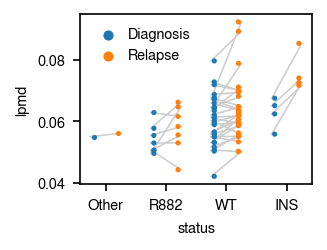

In [424]:
fig = plt.figure(figsize=(2, 1.5))
ax = fig.add_subplot(111)

order = ['Other', 'R882', 'WT', 'INS']
status2x = lambda x: order.index(x)
sns.stripplot(data=tmp[tmp.patient.isin(consistent_patients)], x='status', y='lpmd', hue='is_relapse', dodge=True, jitter=0, order=order, ax=ax)

for patient in consistent_patients:
    status = tmp[tmp.patient == patient].status.unique()[0]
    lpmd_diag = tmp[(tmp.patient == patient) & (tmp.patient.index.str.endswith('Dx'))].lpmd.values[0]
    lpmd_rel = tmp[(tmp.patient == patient) & (tmp.patient.index.str.endswith('Rel'))].lpmd.values[0]
    
    x = status2x(status)
    ax.plot([x-0.25, x+0.25], [lpmd_diag, lpmd_rel], c='0.8')
    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Diagnosis', 'Relapse'], frameon=False)

In [413]:
stats.ttest_rel(
    tmp[(tmp.status == 'WT') & (~tmp.is_relapse) & tmp.patient.isin(consistent_patients)].lpmd,
    tmp[(tmp.status == 'WT') & (tmp.is_relapse) & tmp.patient.isin(consistent_patients)].lpmd,
)

Ttest_relResult(statistic=-2.748201344144857, pvalue=0.010548611314859681)

In [416]:
stats.ttest_rel(
    tmp[(tmp.status == 'Other') & (~tmp.is_relapse) & tmp.patient.isin(consistent_patients)].lpmd,
    tmp[(tmp.status == 'Other') & (tmp.is_relapse) & tmp.patient.isin(consistent_patients)].lpmd,
)

/data/project/dohoon/miniconda3/envs/dnmt3a/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/data/project/dohoon/miniconda3/envs/dnmt3a/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_relResult(statistic=nan, pvalue=nan)